In [ ]:
#Prepare a prediction model for profit of 50_startups data.
#Do transformations for getting better predictions of profit and
#make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [13]:
data=pd.read_csv(r"C:\Users\MS_More\Desktop\Data Science\Materials\A5\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
data1 = data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
data1[data1.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [19]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [21]:
data1.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


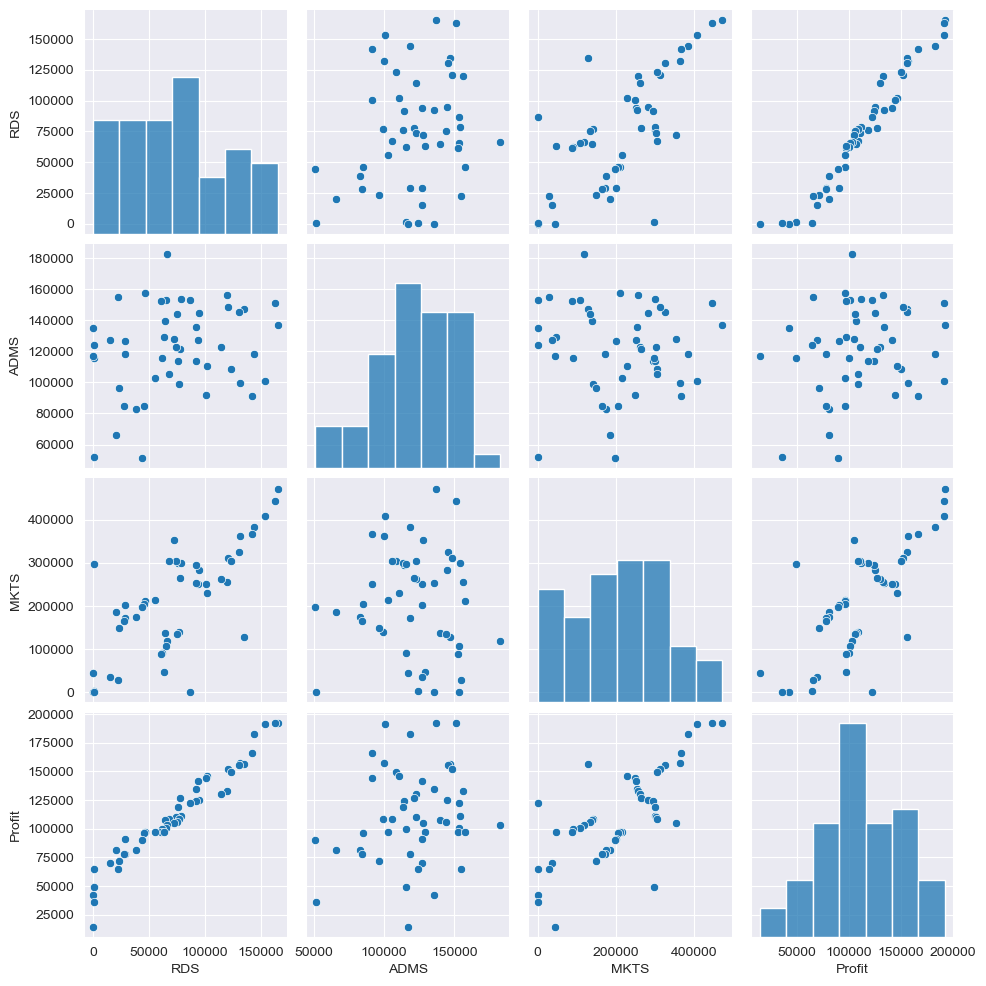

In [22]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [23]:
model = smf.ols("Profit~RDS+ADMS+MKTS", data=data1).fit()

In [24]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [25]:
print(model.tvalues, '\n',model.pvalues)

Intercept     7.626218
RDS          17.846374
ADMS         -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMS         6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [26]:
(model.rsquared, model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [27]:
slr_adms = smf.ols('Profit~ADMS',data=data1).fit()
print(slr_adms.tvalues, '\n', slr_adms.pvalues)

Intercept    3.040044
ADMS         1.419493
dtype: float64 
 Intercept    0.003824
ADMS         0.162217
dtype: float64


In [28]:
slr_mkts = smf.ols("Profit~MKTS",data=data1).fit()
slr_mkts.tvalues , slr_mkts.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [29]:
mlr_am = smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

In [30]:

rsq_rds = smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_rds = 1/(1-rsq_rds)

rsq_adms = smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_adms = 1/(1-rsq_adms)

rsq_mkts = smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_mkts = 1/(1-rsq_mkts)


d1 = {'Variables' :['RDS','ADMS','MKTS'], 'VIF' :[vif_rds,vif_adms,vif_mkts]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


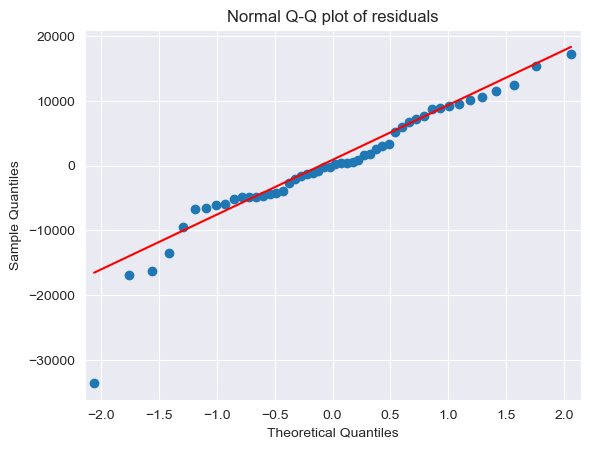

In [31]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [33]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

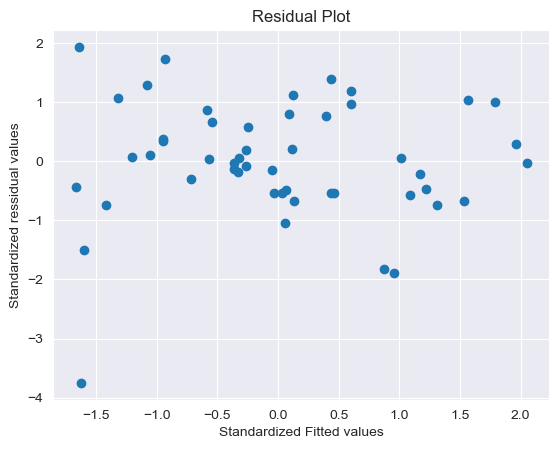

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized ressidual values')
plt.show()

eval_env: 1


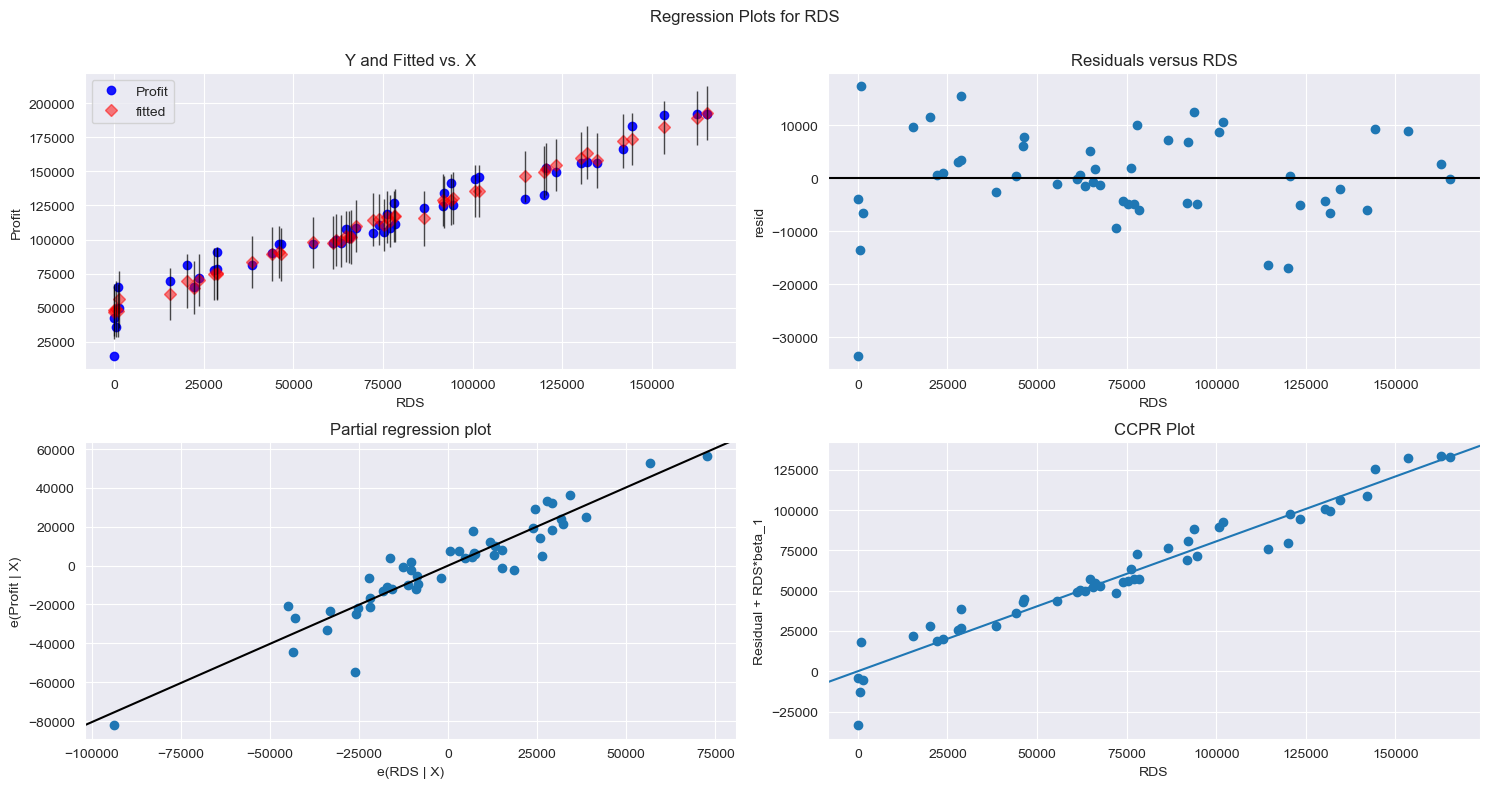

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


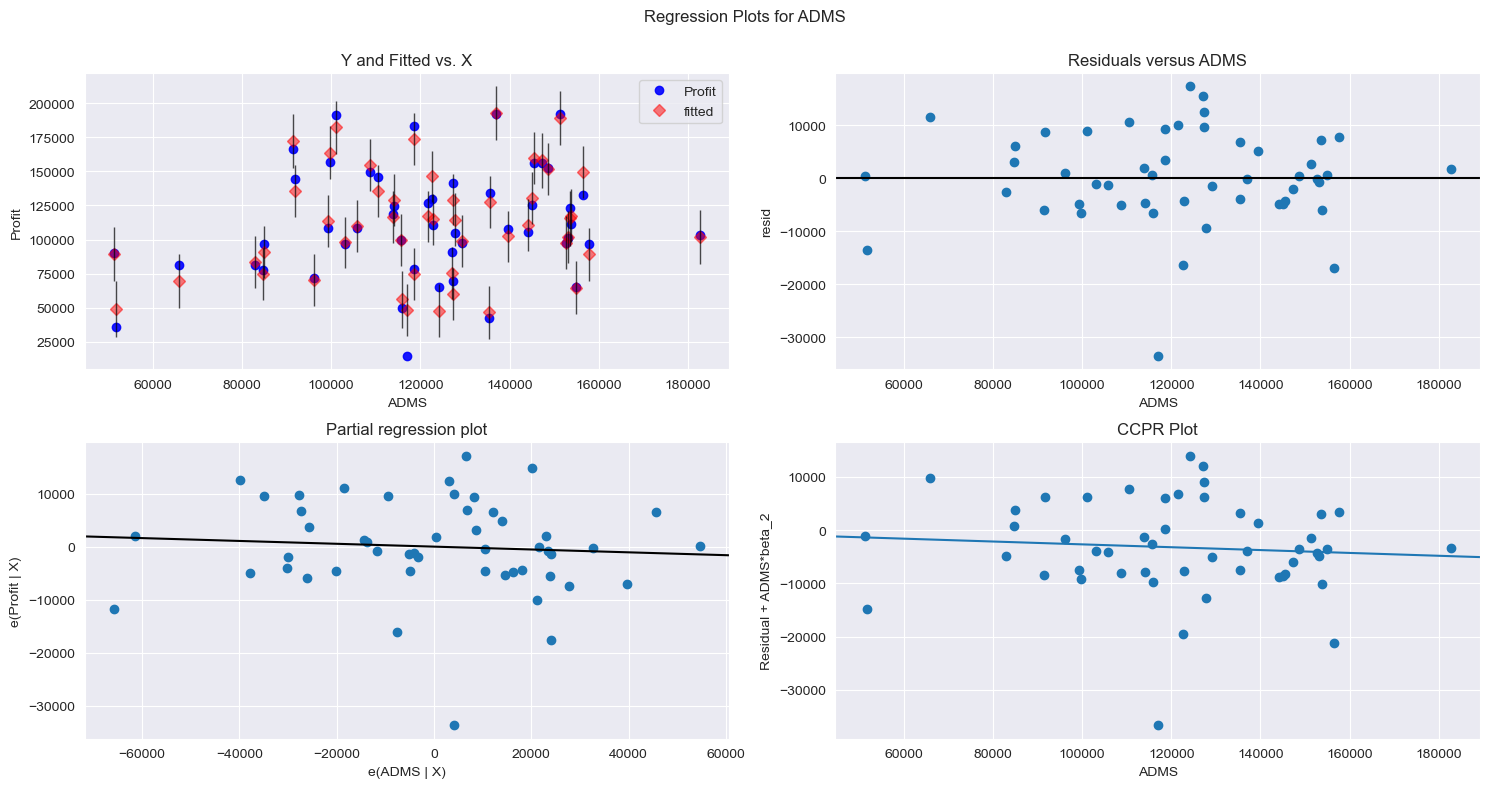

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

eval_env: 1


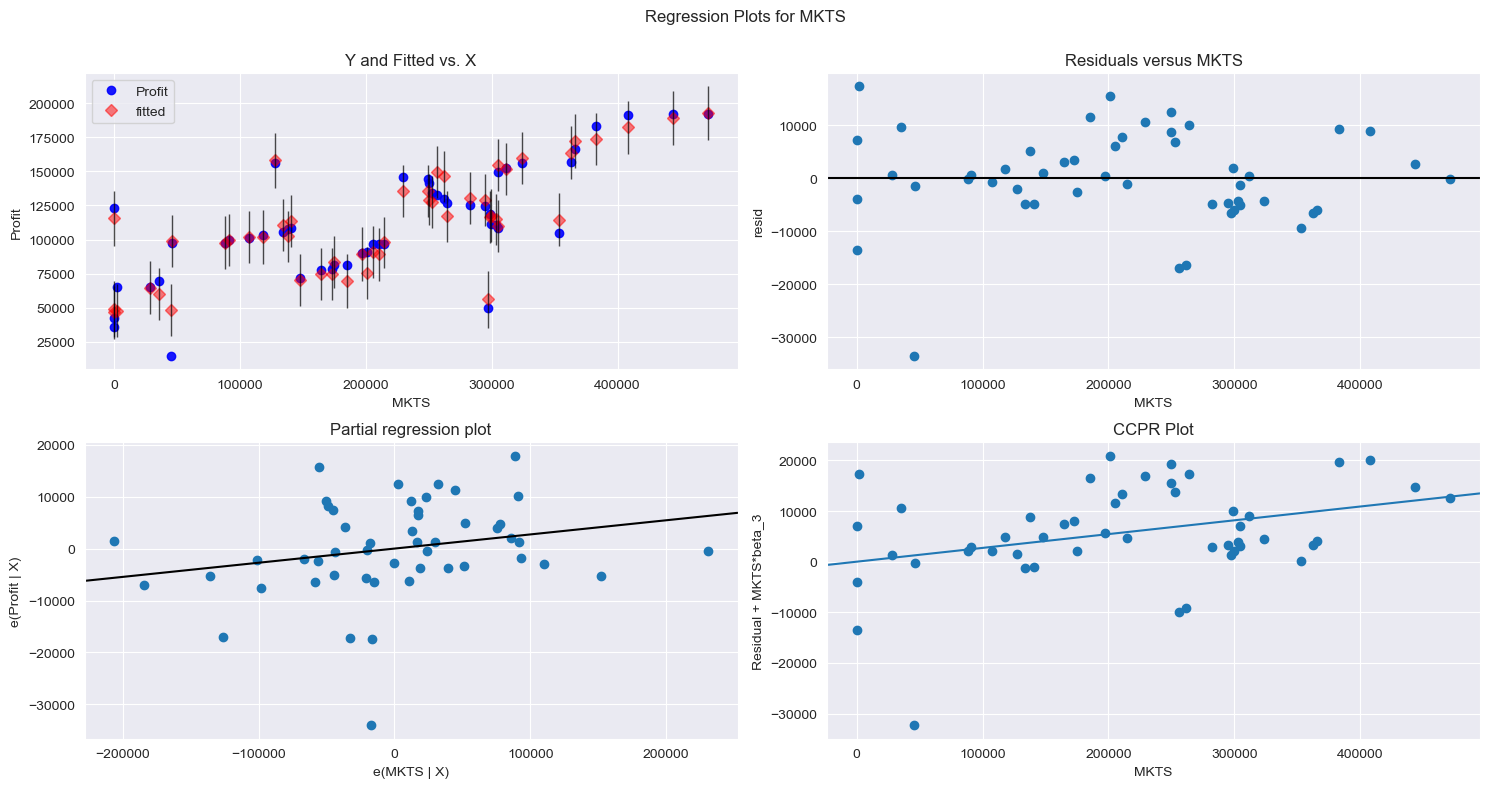

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig=fig)
plt.show()

In [38]:
model_influence = model.get_influence()
(C,_) = model_influence.cooks_distance
C

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

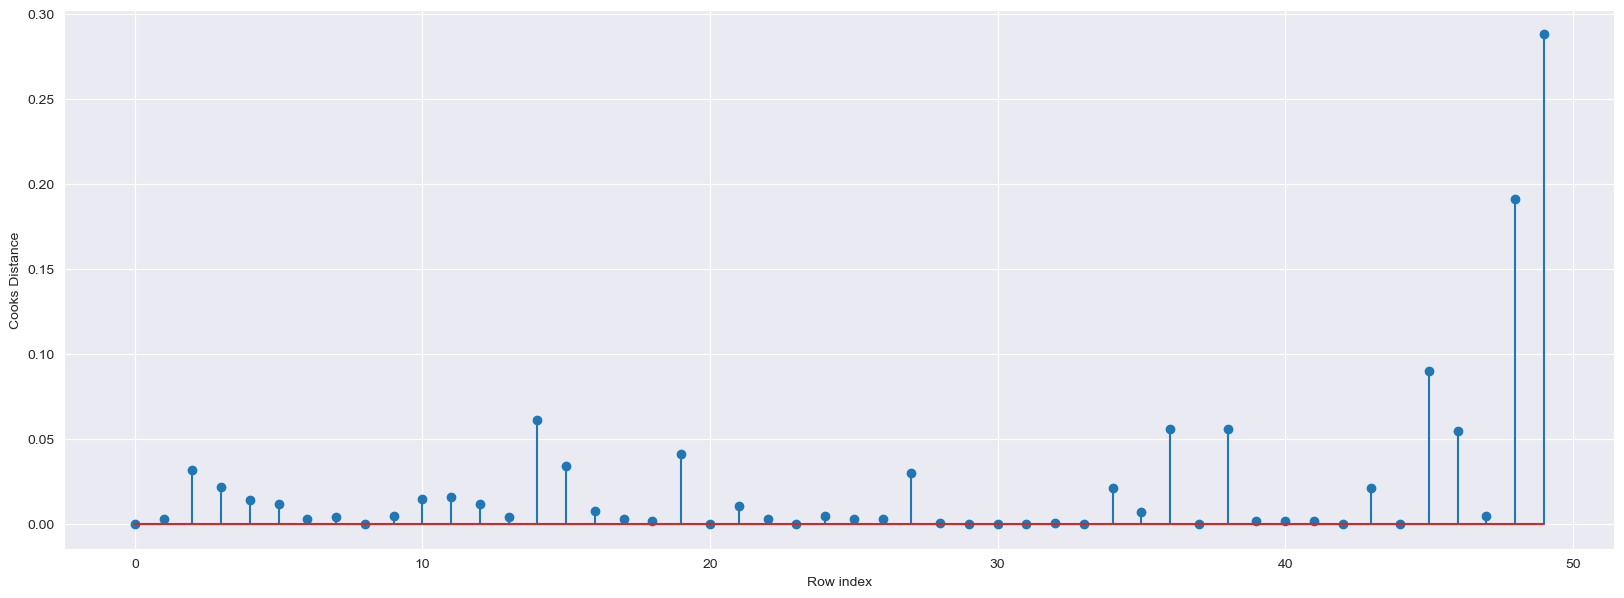

In [39]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)), np.round(C,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(C),np.max(C))

(49, 0.28808229275432634)

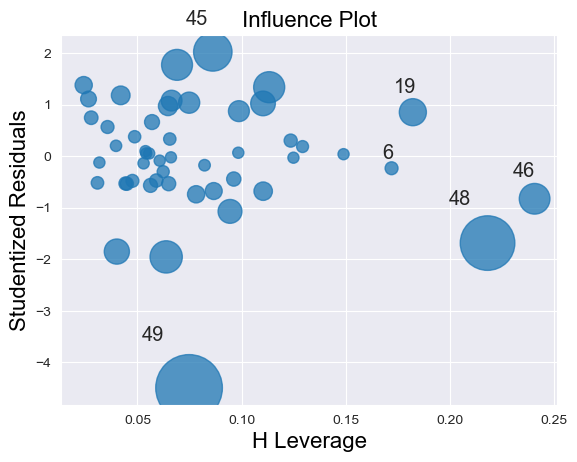

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [45]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [46]:
data1_new = pd.read_csv(r"C:\Users\MS_More\Desktop\Data Science\Materials\A5\50_Startups.csv")

In [48]:
data1_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [49]:
data2=data1_new.drop(data1_new.index[[49]],axis=0).reset_index()

In [50]:
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [51]:
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [52]:
model.predict(new_data)

0    107920.738401
dtype: float64

In [53]:
pred_S=model.predict(data1)
pred_S

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [54]:
df={'Prep_Models':['Model','Model'],'Rsquared':[model.rsquared,model.rsquared]}
table=pd.DataFrame(df)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Model,0.950746


In [ ]:
#Consider only the below columns and prepare a prediction model for predicting Price.

#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

In [57]:
dt=pd.read_csv(r"C:\Users\MS_More\Desktop\Data Science\Materials\A5\ToyotaCorolla.csv")

In [58]:
dt.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [59]:
dt.info

<bound method DataFrame.info of         Id  ... Tow_Bar
0        1  ...       0
1        2  ...       0
2        3  ...       0
3        4  ...       0
4        5  ...       0
...    ...  ...     ...
1431  1438  ...       0
1432  1439  ...       0
1433  1440  ...       0
1434  1441  ...       0
1435  1442  ...       0

[1436 rows x 38 columns]>

In [60]:
dt1 = pd.concat([dt.iloc[:,2:4],dt.iloc[:,6:7],dt.iloc[:,8:9],dt.iloc[:,12:14],dt.iloc[:,15:18]],axis=1)
dt1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [62]:
dt2 = dt1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
dt2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [63]:
dt2[dt2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [64]:
dt3=dt2.drop_duplicates().reset_index(drop=True)
dt3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [65]:
dt3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [66]:
dt3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [86]:
sns.set_style(style='darkgrid')
sns.pairplot(dt3)

In [68]:
mdl=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dt3).fit()

In [69]:
mdl.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [70]:
print(mdl.tvalues , '\n', mdl.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


In [71]:
mdl.rsquared , mdl.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [72]:
slr_CC=smf.ols('Price~CC',data=dt3).fit()
slr_CC.tvalues , slr_CC.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [74]:
slr_DD=smf.ols('Price~Doors',data=dt3).fit()
slr_DD.tvalues , slr_DD.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [75]:
mlr_CD= smf.ols('Price~CC+Doors',data=dt3).fit()
mlr_CD.tvalues , mlr_CD.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [78]:
rsq_AGE = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=dt3).fit().rsquared
vif_AGE = 1/(1-rsq_AGE)

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=dt3).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=dt3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=dt3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=dt3).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=dt3).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=dt3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=dt3).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [79]:
data_df = {'Variables':['AGE','KM','HP','CC','Doors','Gears','QT','Weight'],
     'Vif':[vif_AGE,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
vif_df = pd.DataFrame(data_df)
vif_df

,Variables,Vif
0,AGE,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [87]:
sns.set_style(style='darkgrid')
sns.pairplot(dt3)

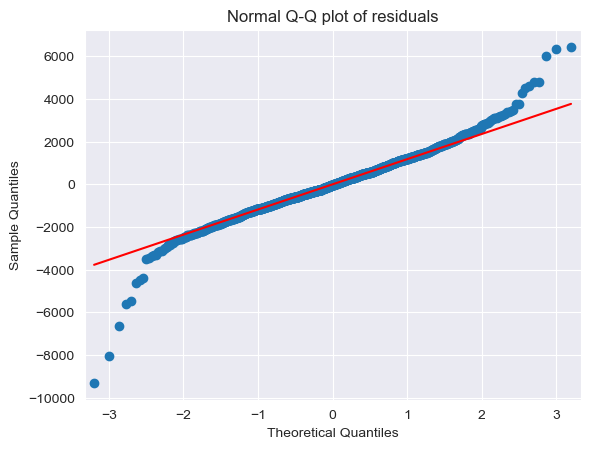

In [89]:
qqplot = sm.qqplot(mdl.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [90]:
list(np.where(mdl.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [92]:
list(np.where(mdl.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [93]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

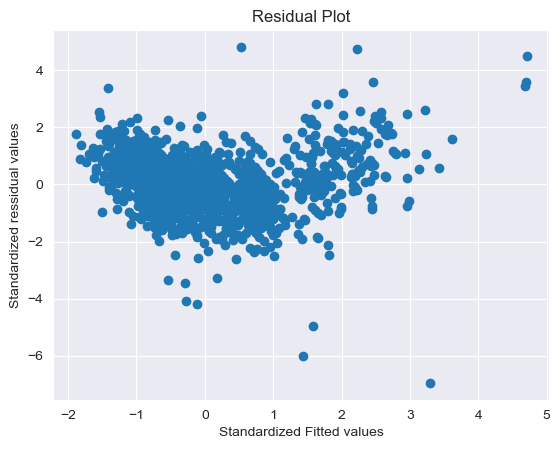

In [94]:
plt.scatter(get_standardized_values(mdl.fittedvalues),
           get_standardized_values(mdl.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized ressidual values')
plt.show()

eval_env: 1


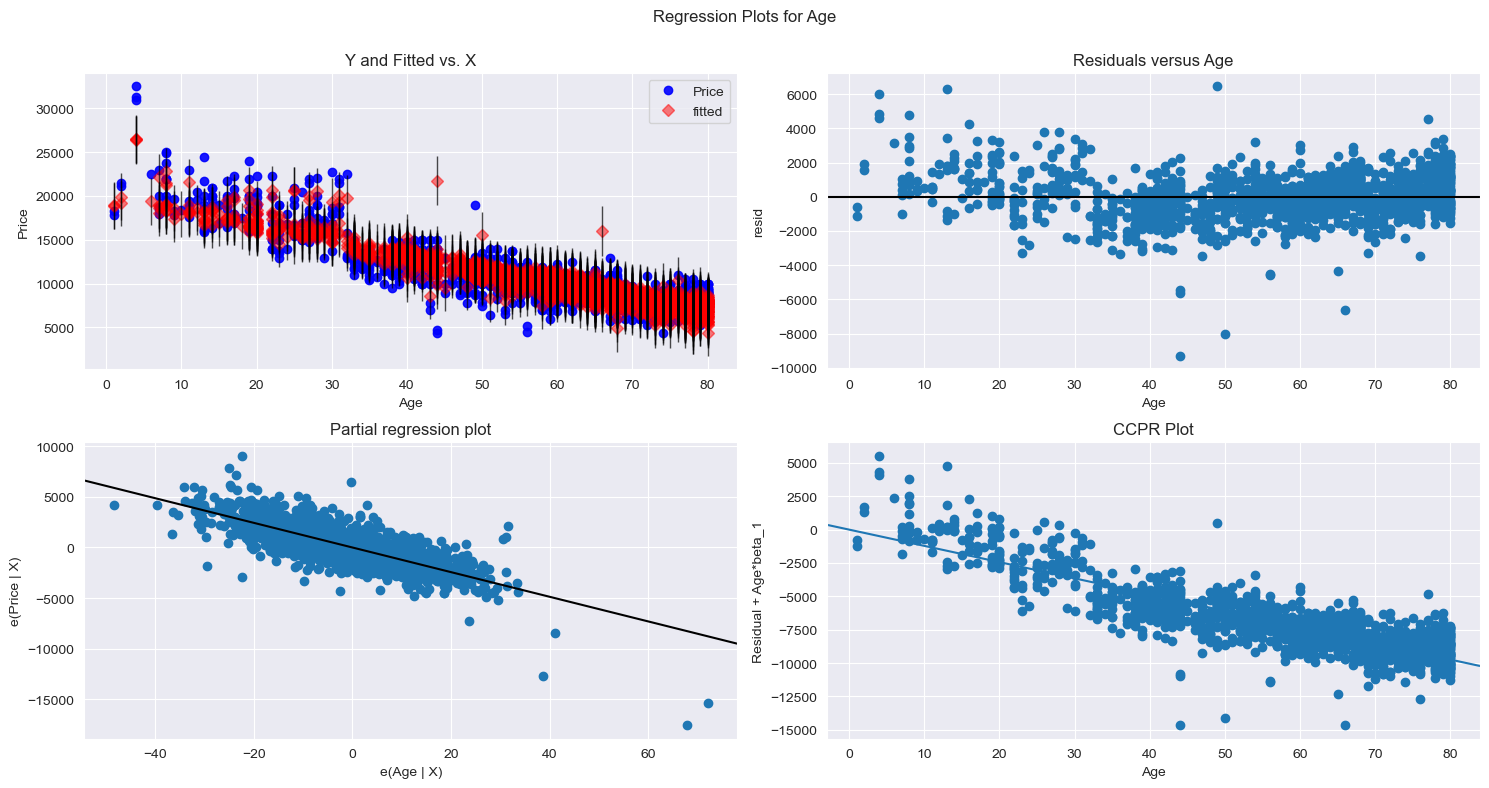

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "Age",fig=fig)
plt.show()

eval_env: 1


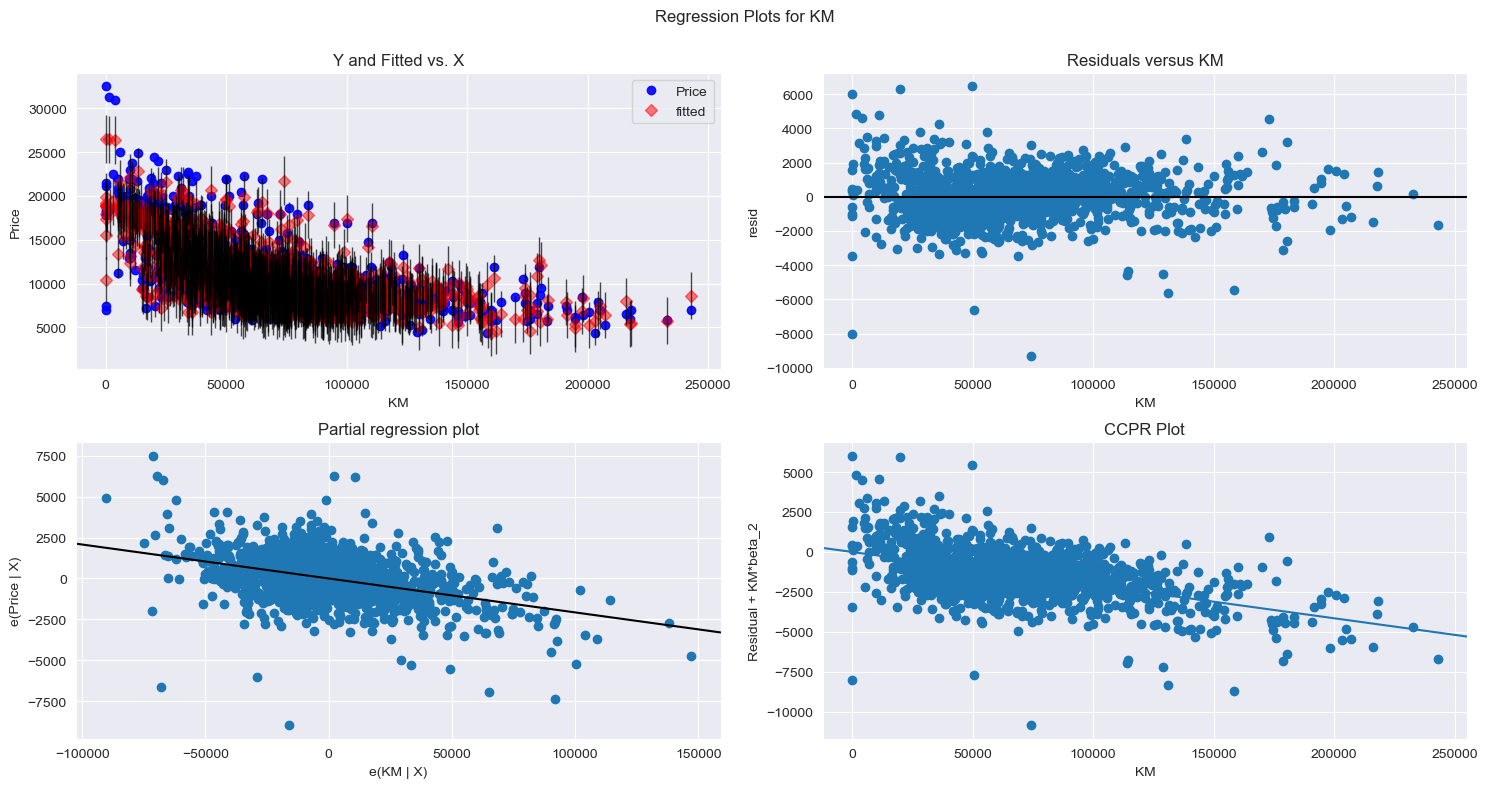

In [96]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "KM",fig=fig)
plt.show()

eval_env: 1


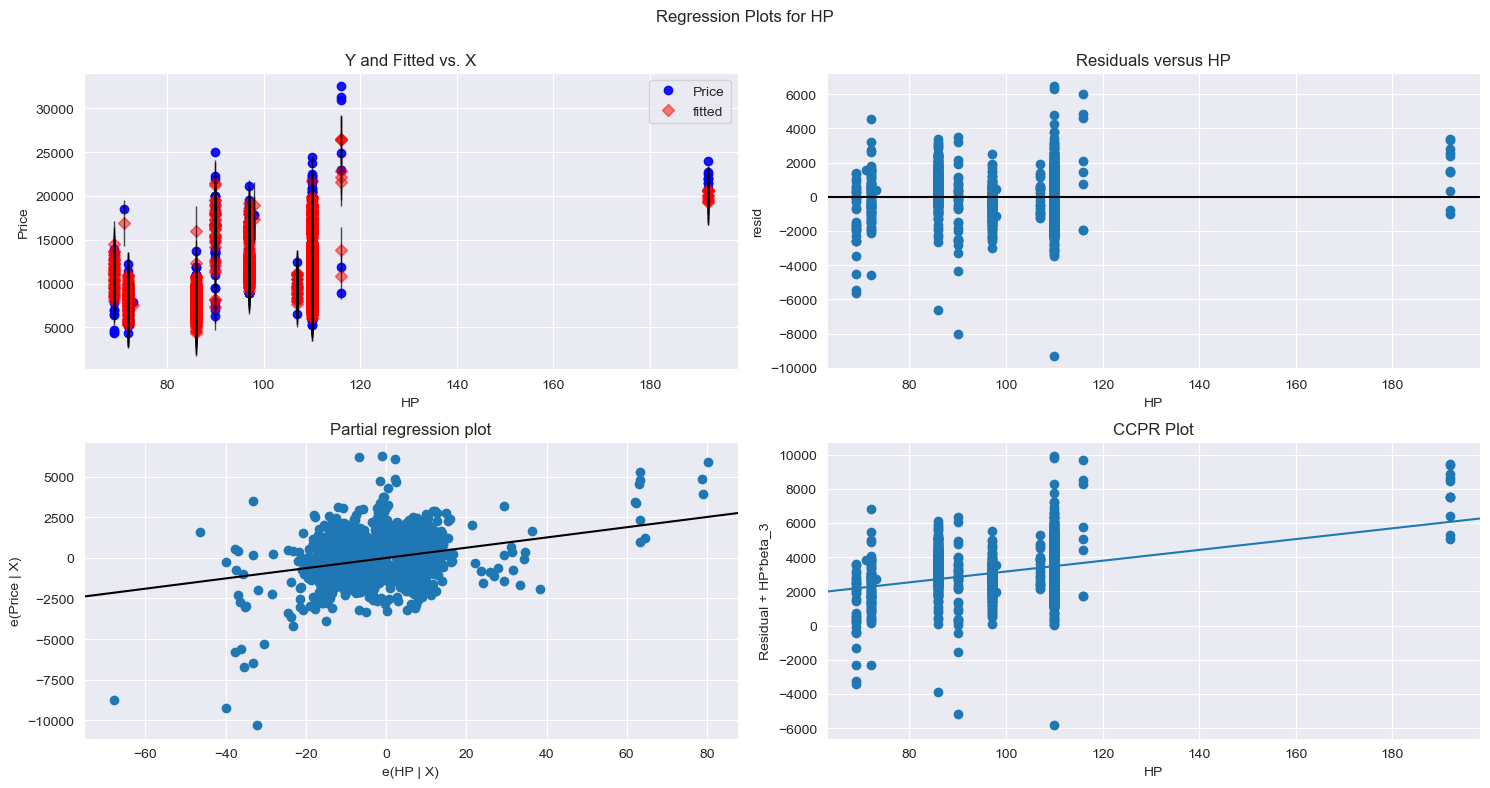

In [97]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "HP",fig=fig)
plt.show()

eval_env: 1


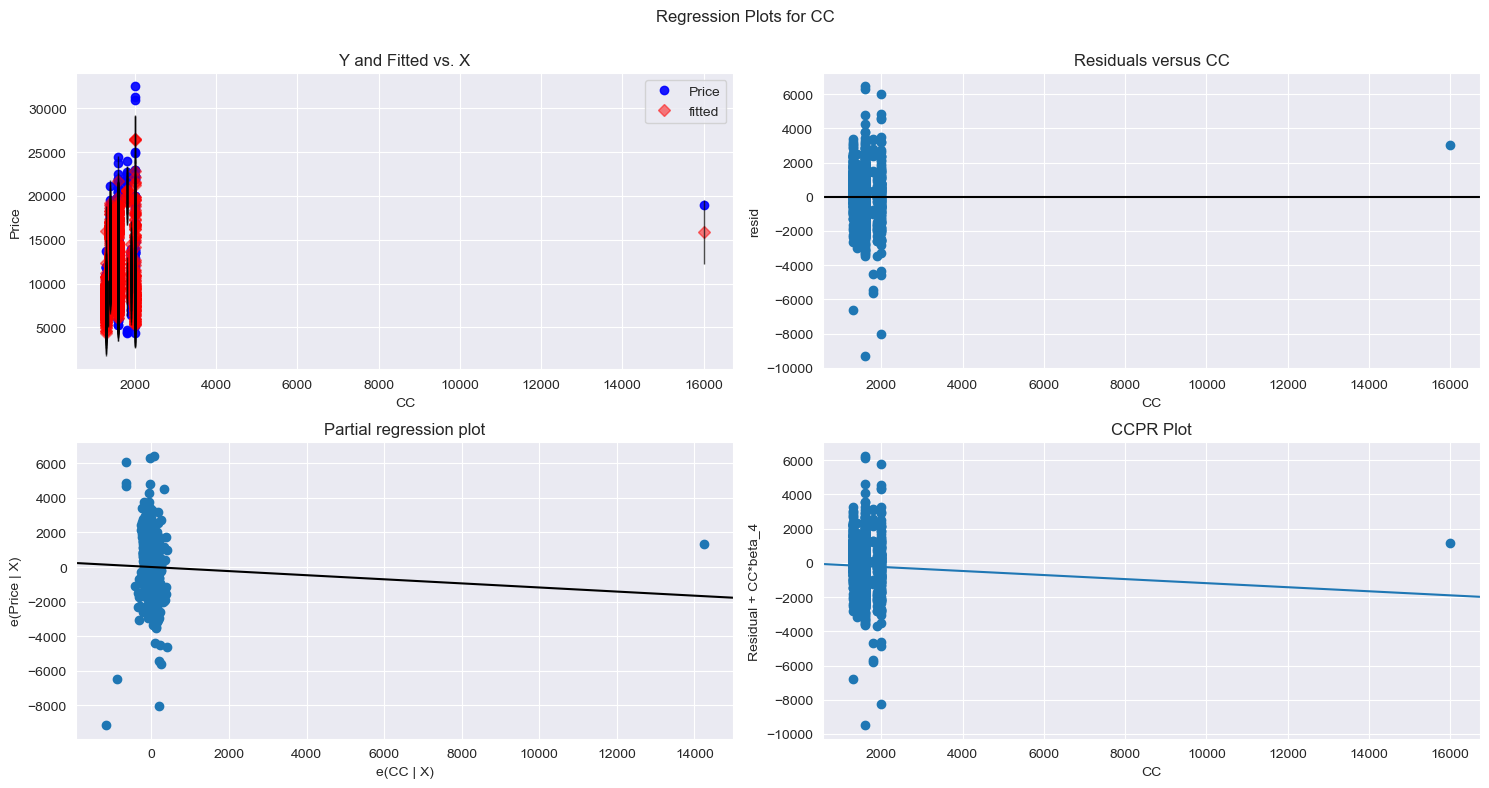

In [98]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "CC",fig=fig)
plt.show()

eval_env: 1


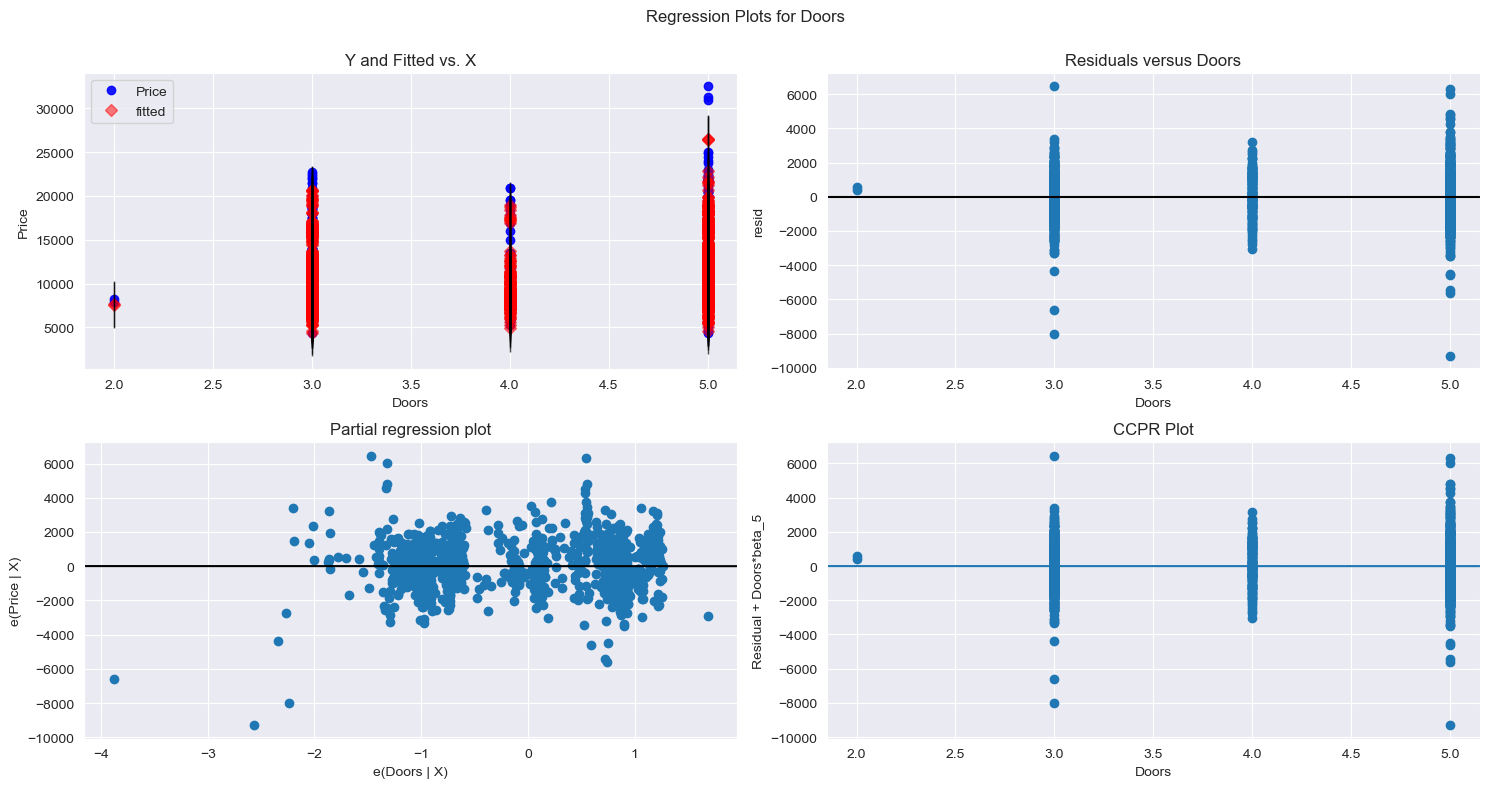

In [99]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "Doors",fig=fig)
plt.show()

eval_env: 1


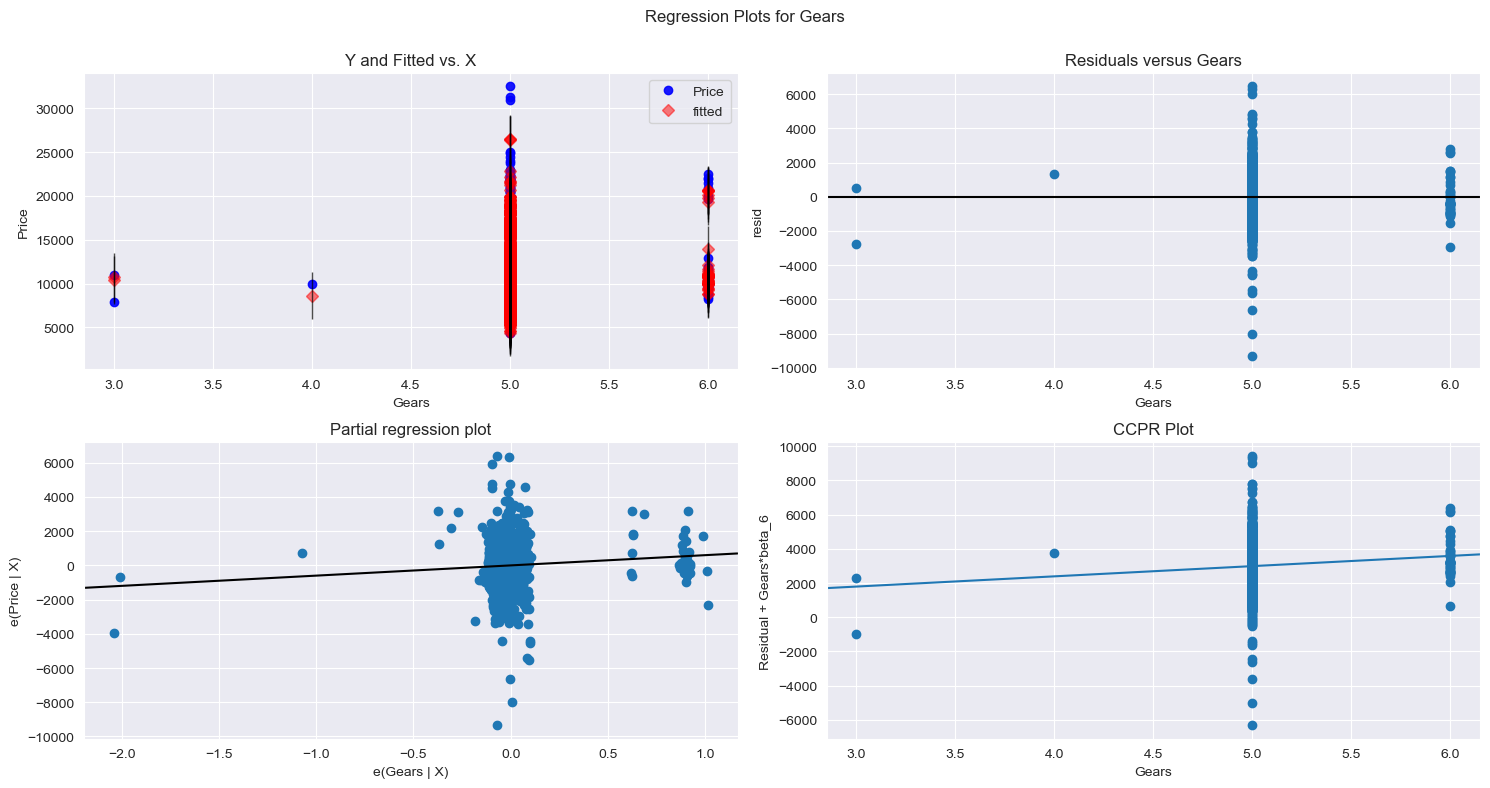

In [100]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "Gears",fig=fig)
plt.show()

eval_env: 1


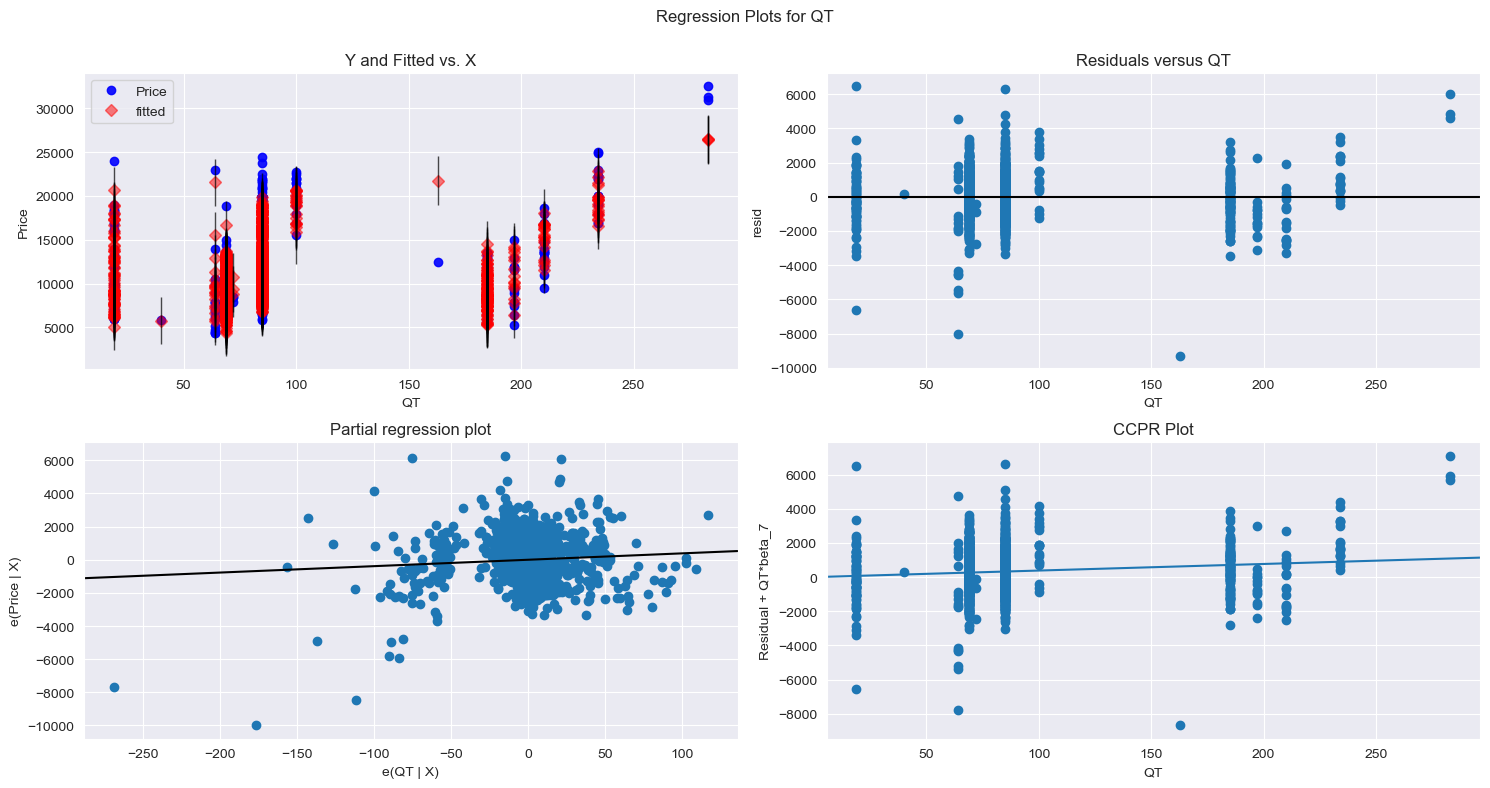

In [101]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "QT",fig=fig)
plt.show()

eval_env: 1


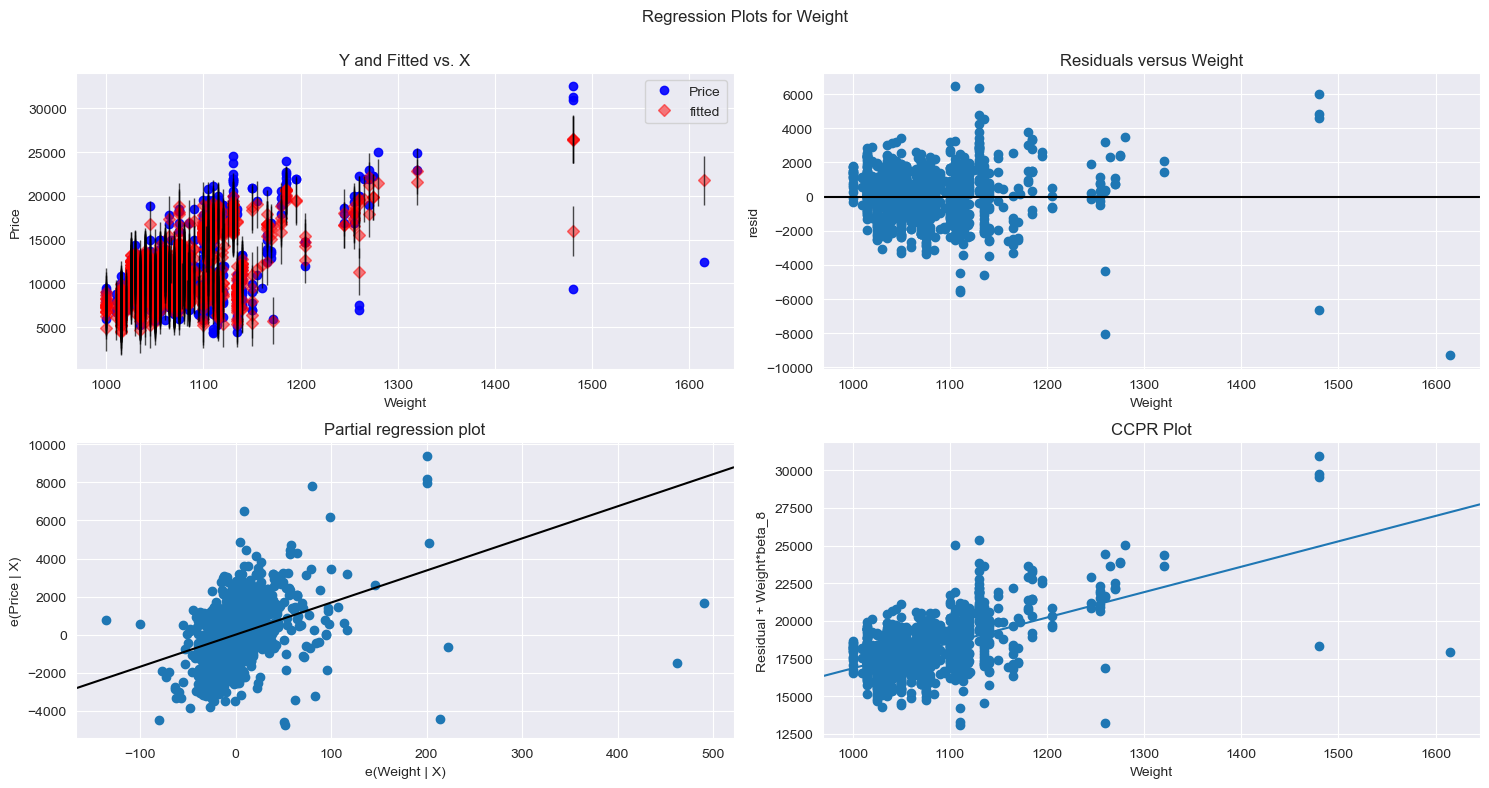

In [102]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mdl, "Weight",fig=fig)
plt.show()

In [104]:
model_influence = mdl.get_influence()
(C,_) = model_influence.cooks_distance
C

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

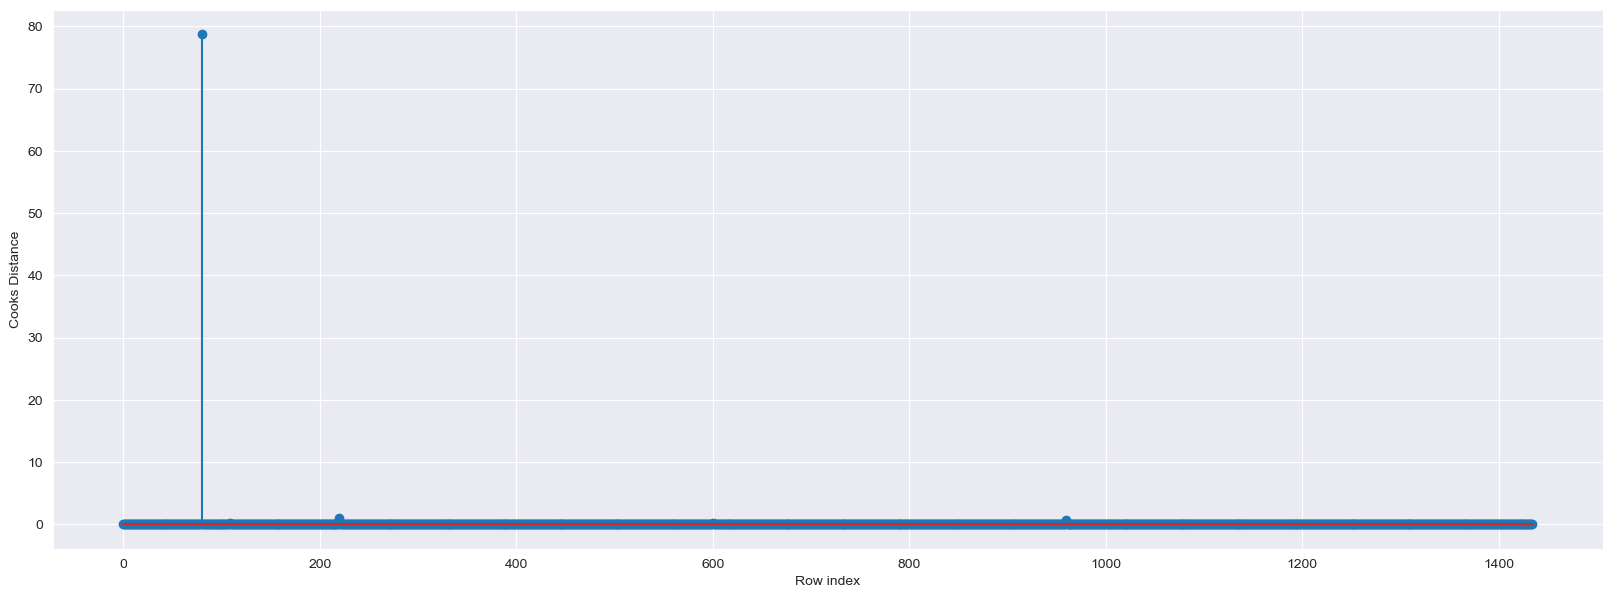

In [105]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dt3)),np.round(C,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [106]:
(np.argmax(C),np.max(C))

(80, 78.7295058224916)

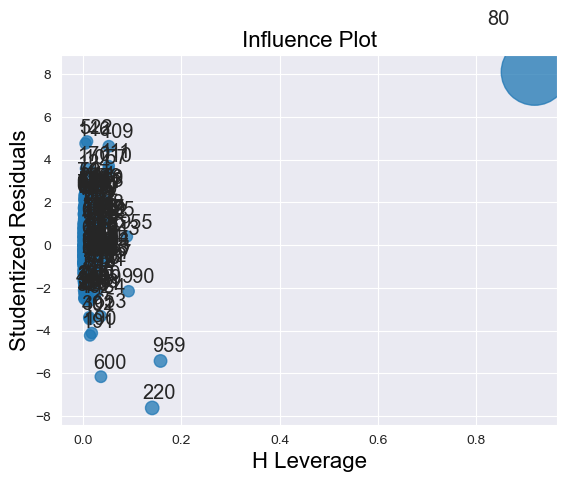

In [108]:
influence_plot(mdl)
plt.show()

In [109]:
k = dt3.shape[1]
n = dt3.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [110]:
dt3[dt3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [111]:
dt_new = dt3.copy()
dt_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [112]:
dt_new1 = dt_new.drop(dt_new.index[[80]],axis=0).reset_index(drop=True)
dt_new1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [119]:
dt_n= pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
dt_n

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [121]:
mdl.predict(dt_n)

0    14918.929348
dtype: float64

In [123]:
pred_T=mdl.predict(dt_new1)
pred_T

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1429     8794.255037
1430     8292.577342
1431     8455.434402
1432     8579.222041
1433    10396.087526
Length: 1434, dtype: float64

In [125]:
df2={'Prep_Models':['Model','Model'],'Rsquared':[mdl.rsquared,mdl.rsquared]}
table=pd.DataFrame(df2)
table

,Prep_Models,Rsquared
0,Model,0.86252
1,Model,0.86252
